In [17]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib
import urllib2
import bs4 #this is beautiful soup
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from secret import *

In [18]:
def convert_to_floats(cell):
    """
    Takes the contents of a cell and transfroms it into a float
    and removes specific extra character strings
    \n\n\n\nVideo\nShotchart\n\n\n\n\n\n
    and 
    \n\n\n\nVideo\n\n\n\n\n\n\n
    """
    return float(str((cell.text)).replace('\n\n\n\nVideo\nShotchart\n\n\n\n\n\n', '').replace('\n\n\n\nVideo\n\n\n\n\n\n\n', ''))


In [19]:
# Initialize the empty lists, these will eventually be the columns.
player =[]
team = []
age =[]
games_played = []
losses = []
wins = []
minutes = []
field_goal_percentage = []
three_points_made = []
three_points_attempted = []
three_point_percentage = []
free_throw_percentage = []
double_doubles = []
triple_double = []
plus_minus =[]
field_goals_made = []
field_goals_attempted = []
free_throw_made = []
free_throw_attempted = []
offensive_rebound = []
defensive_rebound = []
rebounds = []
assists = []
turnovers = []
steals = []
blocks = []
personal_fouls = []
points = []



# url = http://stats.nba.com/league/player/#!/?Season=2015-16&SeasonType=Regular%20Season&TeamID=1610612757
# Opening a csv file which contains the javascript? table and parsing with beautiful soup. 
source = open("blzr_2015_playerstats.csv").read()
soup = bs4.BeautifulSoup(source)

# Isolate table
table = soup.find('table', {'class': 'table'})

# Create a list that has the header labe.s 
header_label = []
for row in table.findAll('tr'):
    head_labels = row.findAll('th')
    for x in head_labels:
        header_label.append(str(x.text))

# Extract information from each cell and append into a list (columns)
for row in table.findAll('tr')[1:]:
    col = row.findAll('td') 
    player.append(str(col[0].text))
    team.append(col[1].text)
    age.append(convert_to_floats(col[2]))
    games_played.append(convert_to_floats(col[3]))
    wins.append(convert_to_floats(col[4]))
    losses.append(convert_to_floats(col[5]))
    minutes.append(convert_to_floats(col[6]))
    field_goals_attempted.append(convert_to_floats(col[7]))
    field_goals_made.append(convert_to_floats(col[8]))
    field_goal_percentage.append(convert_to_floats(col[9]))
    three_points_made.append(convert_to_floats(col[10]))
    three_points_attempted.append(convert_to_floats(col[11]))
    three_point_percentage.append(convert_to_floats(col[12]))
    free_throw_made.append(convert_to_floats(col[13]))
    free_throw_attempted.append(convert_to_floats(col[14]))
    free_throw_percentage.append(convert_to_floats(col[15]))
    offensive_rebound.append(convert_to_floats(col[16]))
    defensive_rebound.append(convert_to_floats(col[17]))
    rebounds.append(convert_to_floats(col[18]))
    assists.append(convert_to_floats(col[19]))
    steals.append(convert_to_floats(col[20]))
    turnovers.append(convert_to_floats(col[21]))
    blocks.append(convert_to_floats(col[22]))
    personal_fouls.append(convert_to_floats(col[23]))
    double_doubles.append(convert_to_floats(col[24]))
    triple_double.append(convert_to_floats(col[25]))
    points.append(convert_to_floats(col[26]))
    plus_minus.append(convert_to_floats(col[27]))

In [115]:
# Create a list of columns to pass to pandas. 
x  = [player, 
      team, 
      age,
      games_played,
      wins, 
      losses, 
      minutes, 
      field_goals_made,
      field_goals_attempted, 
      field_goal_percentage, 
      three_points_made, 
      three_points_attempted, 
      three_point_percentage, 
      free_throw_made, 
      free_throw_attempted, 
      free_throw_percentage, 
      offensive_rebound, 
      defensive_rebound,
      rebounds, 
      assists, 
      turnovers, 
      steals, 
      blocks, 
      personal_fouls,
      double_doubles,
      triple_double,
      points,
      plus_minus]

# Create dataframe in pandas. 
# - pass list of lists
# - transpose
# - set column names 

df = pd.DataFrame(x)
df = df.transpose()
df.columns = header_label
df
attributes = []
i = 0 

while i <= 26:
    for key,value in globals().iteritems():
        if type(value) == list and value == x[i]:
            attributes.append(key)
            i+=1
attributes.append('plus_minus')
attributes

['player',
 'team',
 'age',
 'games_played',
 'wins',
 'losses',
 'minutes',
 'field_goals_made',
 'field_goals_attempted',
 'field_goal_percentage',
 'three_points_made',
 'three_points_attempted',
 'three_point_percentage',
 'free_throw_made',
 'free_throw_attempted',
 'free_throw_percentage',
 'offensive_rebound',
 'defensive_rebound',
 'rebounds',
 'assists',
 'turnovers',
 'steals',
 'blocks',
 'personal_fouls',
 'double_doubles',
 'triple_double',
 'points',
 'plus_minus']

In [122]:
attr = pd.Series(attributes)

0    attributes
dtype: object

In [120]:
df.columns = attr

In [121]:
df.to_csv('Blazer_stat_table_021316 ')
attr.to_csv('stat_names')

In [149]:
df.sort('field_goal_percentage')
attr
df['steals']

/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


0     1.6
1     0.9
2     2.4
3     0.6
4     0.1
5     3.3
6     0.7
7     0.8
8     0.3
9     1.9
10    0.9
11    1.3
12    0.6
13    0.3
14    0.8
Name: steals, dtype: object

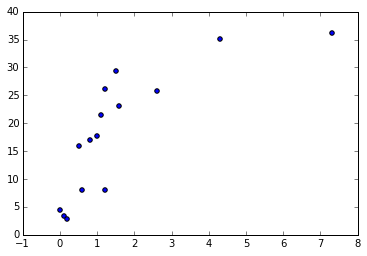

In [164]:
plt.scatter(df.assists,df.minutes)
plt.show()

In [48]:
df.sort('AST', ascending=False)

/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
5,Damian Lillard,POR,25,46,22,24,36.1,19.7,8.2,41.8,...,4.4,7.3,0.9,3.3,0.3,2.3,13,0,24.2,1.2
2,CJ McCollum,POR,24,51,26,25,35.1,18.3,8.1,44.3,...,3.6,4.3,1.2,2.4,0.3,2.4,2,0,20.8,2
9,Mason Plumlee,POR,25,53,26,27,25.7,6.6,3.4,50.9,...,7.7,2.6,0.8,1.9,1.1,3.1,13,0,9.1,-0.2
11,Meyers Leonard,POR,23,46,24,22,23.1,7.6,3.4,44.2,...,5,1.6,0.2,1.3,0.3,3,2,0,8.7,1.3
0,Al-Farouq Aminu,POR,25,53,26,27,29.4,9.2,3.8,40.9,...,6.4,1.5,0.9,1.6,0.7,2.2,7,0,10.4,1
1,Allen Crabbe,POR,23,52,25,27,26.1,9.2,4.4,47.7,...,2.7,1.2,0.9,0.9,0.2,2.6,0,0,11.3,-0.2
14,Tim Frazier,POR,25,34,18,16,8,1.8,0.6,33.3,...,1.1,1.2,0.3,0.8,0,0.9,0,0,1.5,-0.5
6,Ed Davis,POR,26,52,25,27,21.4,4.3,2.6,60.8,...,7.2,1.1,0.6,0.7,0.7,2.5,8,0,6.7,0.2
7,Gerald Henderson,POR,28,44,22,22,17.7,6.6,2.8,42.4,...,2.7,1,0.4,0.8,0.3,0.9,0,0,7.5,0.4
10,Maurice Harkless,POR,22,51,24,27,17,4.3,2,46.4,...,3,0.8,0.5,0.9,0.4,1.2,1,0,5.1,-1.4


In [177]:
def rankings(col):   
    return df.loc[:,['player', col]].sort(col,ascending=False).reset_index(drop=True)

In [165]:
test ={}
for x in attr:
    if x == 'player':
        print ''
    else:
        test[x] = rankings(x)


/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [178]:
rankings('minutes')

/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,player,minutes
0,Damian Lillard,36.1
1,CJ McCollum,35.1
2,Al-Farouq Aminu,29.4
3,Allen Crabbe,26.1
4,Mason Plumlee,25.7
5,Meyers Leonard,23.1
6,Ed Davis,21.4
7,Gerald Henderson,17.7
8,Maurice Harkless,17
9,Noah Vonleh,16


In [182]:
df['assists_adjusted'] = df['assists']/df['minutes'] 
rankings('assists_adjusted')
df['turnovers_adjusted'] = df['turnovers']/df['minutes'] 
rankings('turnovers_adjusted')

/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,player,turnovers_adjusted
0,Tim Frazier,0.0375
1,Allen Crabbe,0.0344828
2,Pat Connaughton,0.0344828
3,CJ McCollum,0.034188
4,Noah Vonleh,0.03125
5,Mason Plumlee,0.0311284
6,Al-Farouq Aminu,0.0306122
7,Maurice Harkless,0.0294118
8,Ed Davis,0.0280374
9,Damian Lillard,0.0249307


In [172]:
rankings('assists')

/Users/tiffanydevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,player,assists
5,Damian Lillard,7.3
2,CJ McCollum,4.3
9,Mason Plumlee,2.6
11,Meyers Leonard,1.6
0,Al-Farouq Aminu,1.5
1,Allen Crabbe,1.2
14,Tim Frazier,1.2
6,Ed Davis,1.1
7,Gerald Henderson,1
10,Maurice Harkless,0.8


In [59]:
header_label

['Player',
 'TEAM',
 'AGE',
 'GP',
 'W',
 'L',
 'MIN',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'PF',
 'DD2',
 'TD3',
 'PTS',
 '+/-']

In [80]:
some = [3]
lister = [4]
of = [5]
x =[some, lister, of]

dict( (name,eval(name)) for name in x )

TypeError: eval() arg 1 must be a string or code object